In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.uc_sv_ss_model import UCSVSSModel

# 1. Read data

In [3]:
df_inflation = read_inflation(mergeable_format=True).reset_index()
df_inflation

,country,date,inflation
0,Portugal,1970-04-01,0.000000
1,New Zealand,1970-04-01,0.015421
2,Dominican Republic,1970-04-01,-0.001604
3,Finland,1970-04-01,0.008333
4,Ireland,1970-04-01,0.029871
...,...,...,...
7415,Canada,2023-01-01,0.006080
7416,Sweden,2023-01-01,0.014955
7417,Korea,2023-01-01,0.010538
7418,United Kingdom,2023-01-01,0.008814


# 2. AR model per country

In [4]:
model = UCSVSSModel(num_particles = 10000, stochastic_seasonality=True)
model

In [5]:
df_inflation

,country,date,inflation
0,Portugal,1970-04-01,0.000000
1,New Zealand,1970-04-01,0.015421
2,Dominican Republic,1970-04-01,-0.001604
3,Finland,1970-04-01,0.008333
4,Ireland,1970-04-01,0.029871
...,...,...,...
7415,Canada,2023-01-01,0.006080
7416,Sweden,2023-01-01,0.014955
7417,Korea,2023-01-01,0.010538
7418,United Kingdom,2023-01-01,0.008814


In [6]:
df_inflation.pivot(
    index = "date",
    columns = "country",
    values = "inflation"
)

country,Australia,Austria,Belgium,Canada,Cyprus,Denmark,Dominican Republic,Fiji,Finland,France,...,Portugal,Singapore,South Africa,Spain,Sweden,Switzerland,Thailand,Türkiye,United Kingdom,United States
date,,,,,,,,,,,,,,,,,,,,,
1970-04-01,0.011236,0.008889,0.005236,0.000000,0.004670,0.015152,-0.001604,0.003524,0.008333,0.006944,...,0.000000,-0.006706,0.058824,0.000000,0.015504,0.008982,-0.004678,0.012093,0.024390,0.016667
1970-07-01,0.011111,0.013216,0.010417,0.012500,0.021692,0.029851,-0.008031,0.007902,0.000000,0.013793,...,0.000000,0.008439,0.000000,0.042553,0.015267,0.011869,-0.000881,0.013470,0.011905,0.011216
1970-10-01,0.021978,0.008696,0.005155,-0.006173,0.006673,0.014493,0.016516,0.021777,0.008264,0.013605,...,0.058824,0.001674,0.000000,0.020408,0.015038,0.020528,-0.002352,0.041157,0.011765,0.013652
1971-01-01,0.010753,0.012931,0.010256,0.006211,0.008436,0.000000,-0.021344,0.027280,0.024590,0.013423,...,0.000000,0.016708,0.055556,0.020000,0.037037,0.020115,-0.000589,0.042001,0.034884,0.007576
1971-04-01,0.010638,0.008511,0.015228,0.012346,0.008366,0.021429,0.039714,0.004979,0.016000,0.013245,...,0.055556,-0.013147,0.000000,0.019608,0.000000,0.014085,-0.000295,0.049200,0.033708,0.010860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.021295,0.020300,0.033275,0.020211,0.009326,0.021536,0.028900,0.034391,0.021415,0.014870,...,0.015094,0.016682,0.014892,0.020852,0.016158,0.007859,0.019048,0.282867,0.012270,0.022835
2022-04-01,0.017376,0.031142,0.016949,0.031008,0.049593,0.032997,0.022648,0.011465,0.025524,0.022894,...,0.050186,0.019820,0.023478,0.032860,0.032686,0.015595,0.023886,0.169374,0.036364,0.029738
2022-07-01,0.017933,0.026846,0.025000,0.008354,0.018325,0.023957,0.013293,0.007368,0.016000,0.011638,...,0.010619,0.019274,0.027957,0.012038,0.030796,0.006718,0.010083,0.088515,0.017544,0.013147


In [12]:
model.full_fit(df_inflation)

100%|██████████| 35/35 [01:24<00:00,  2.41s/it] 


# 3. Evaluation

In [13]:
df_inflation["country"].unique()

array(['Portugal', 'New Zealand', 'Dominican Republic', 'Finland',
       'Ireland', 'Austria', 'Japan', 'South Africa', 'Korea', 'Fiji',
       'Paraguay', 'Malaysia', 'Sweden', 'Switzerland', 'Thailand',
       'Cyprus', 'Mauritius', 'Greece', 'France', 'Denmark',
       'Netherlands', 'Türkiye', 'Singapore', 'Germany', 'Luxembourg',
       'Guatemala', 'Norway', 'Belgium', 'United States', 'Canada',
       'Italy', 'United Kingdom', 'Australia', 'Spain', 'Philippines'],
      dtype=object)

<Axes: xlabel='date'>

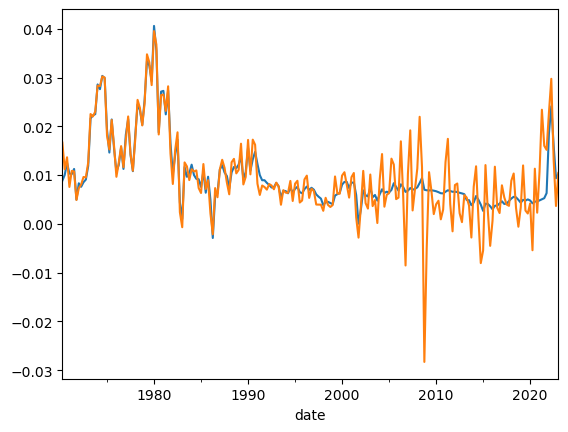

In [14]:
model.stored_state_means["etau"]["United States"].plot()
df_inflation.query("country == 'United States'").set_index("date")["inflation"].plot()

# 4. H-period ahead forecasting

In [15]:
df_inflation

,country,date,inflation
0,Portugal,1970-04-01,0.000000
1,New Zealand,1970-04-01,0.015421
2,Dominican Republic,1970-04-01,-0.001604
3,Finland,1970-04-01,0.008333
4,Ireland,1970-04-01,0.029871
...,...,...,...
7415,Canada,2023-01-01,0.006080
7416,Sweden,2023-01-01,0.014955
7417,Korea,2023-01-01,0.010538
7418,United Kingdom,2023-01-01,0.008814


In [16]:
model.predict(df_inflation.query("date <= '2022-10-1'"))

,inflation,country,date
0,0.007076,Portugal,2023-01-01
1,0.017041,New Zealand,2023-01-01
2,0.014638,Dominican Republic,2023-01-01
3,0.019869,Finland,2023-01-01
4,0.020207,Ireland,2023-01-01
5,0.023151,Austria,2023-01-01
6,-0.000808,Japan,2023-01-01
7,0.014909,South Africa,2023-01-01
8,0.013551,Korea,2023-01-01
9,0.017945,Fiji,2023-01-01


In [17]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2010-01-01", h=1)
forecast

,inflation,country,date
0,0.004431,Portugal,2010-01-01
1,0.004270,New Zealand,2010-01-01
2,0.014054,Dominican Republic,2010-01-01
3,-0.002321,Finland,2010-01-01
4,0.009412,Ireland,2010-01-01
...,...,...,...
1850,0.047544,Italy,2023-01-01
1851,0.018902,United Kingdom,2023-01-01
1852,0.016035,Australia,2023-01-01
1853,0.003772,Spain,2023-01-01


<Axes: xlabel='date'>

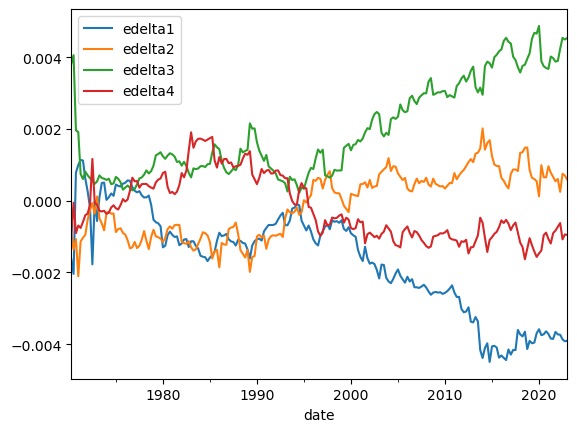

In [18]:
model.stored_state_means.loc["United States"][["edelta1", "edelta2", "edelta3", "edelta4"]].plot()

Text(0.5, 1.0, 'Forecasts, tau and actual inflation for the US')

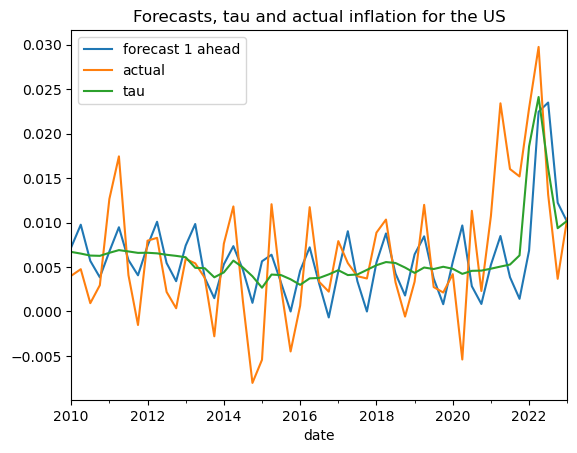

In [19]:
import matplotlib.pyplot as plt
forecast.query("country == 'United States'").set_index("date")['inflation'].plot(label = "forecast 1 ahead")
df_inflation.query("country == 'United States' and date >= '2010-01-01'").set_index("date")['inflation'].plot(label = "actual")
model.stored_state_means.loc["United States"].loc["2010-01-01":]["etau"].plot(label = "tau")
plt.legend()
plt.title("Forecasts, tau and actual inflation for the US")

Text(0.5, 1.0, 'Tau over time per country')

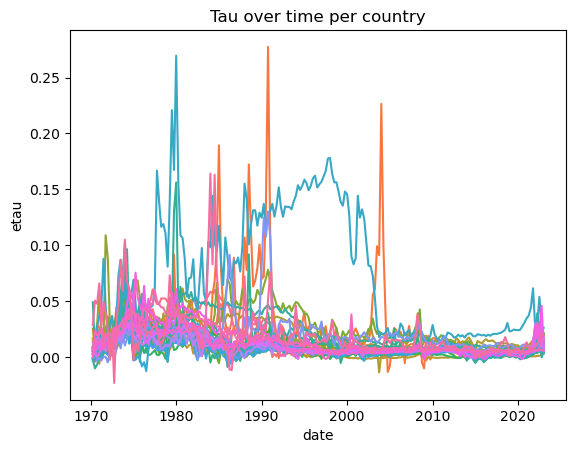

In [20]:
import seaborn as sns
sns.lineplot(
    data = model.stored_state_means["etau"].to_frame().reset_index(),
    x = "date",
    y = "etau",
    hue = "country"
)
plt.legend().remove()
plt.title("Tau over time per country")

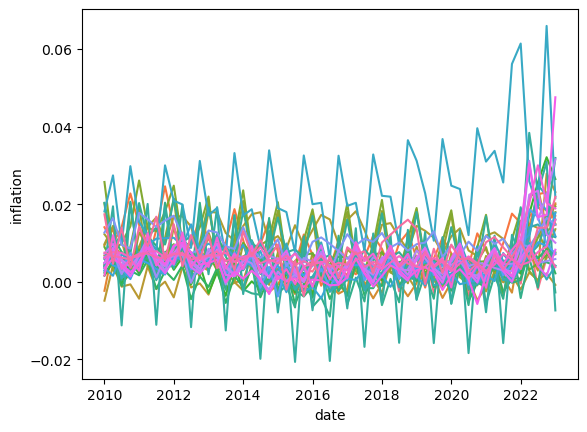

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "date",
    y = "inflation",
    hue = "country"
)
# turn off legend
plt.legend().remove()

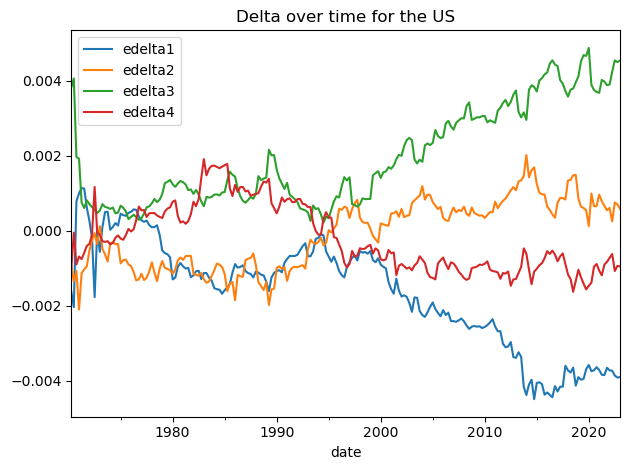

In [22]:
model.stored_state_means.loc["United States"][["edelta1", "edelta2", "edelta3", "edelta4"]].plot()
plt.title("Delta over time for the US")
plt.tight_layout()
plt.savefig("../../Figures/delta_over_time.png", dpi = 300)

# 5. Compare the forecast with the actual data

In [23]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,pred,country,date,actual
1755,0.002884,Austria,2022-07-01,0.026846
1756,0.000466,Japan,2022-07-01,0.010628
1757,0.013862,South Africa,2022-07-01,0.027957
1758,0.012871,Korea,2022-07-01,0.011352
1759,0.000186,Fiji,2022-07-01,0.007368
...,...,...,...,...
1850,0.047544,Italy,2023-01-01,0.003938
1851,0.018902,United Kingdom,2023-01-01,0.008814
1852,0.016035,Australia,2023-01-01,0.013756
1853,0.003772,Spain,2023-01-01,0.006013


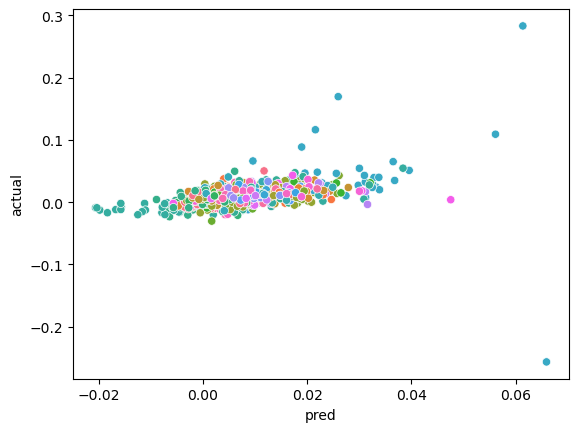

In [24]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "country"
)
plt.legend().remove()

In [25]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     467.0
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           1.47e-92
Time:                        10:16:25   Log-Likelihood:                 5463.7
No. Observations:                1855   AIC:                        -1.092e+04
Df Residuals:                    1853   BIC:                        -1.091e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.000      3.047      0.002       0.000       0.002
pred           0.9003      0.042     21.611      0.000       0.819       0.982
==============================================================================
Omnibus:                     1986.828   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5683637.371
Skew:                          -3.996   Prob(JB):                         0.00
Kurtosis:                     274.055   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#getDensities
from seminartools.models.uc_sv_ss_model import UCSVSSModel
modelDistribution = UCSVSSModel(num_particles=10000, stochastic_seasonality=True, pointwise_aggregation_method = "distribution")
modelDistribution.full_fit(df_inflation)


100%|██████████| 35/35 [00:42<00:00,  1.22s/it]


In [34]:
distributionForecast = h_period_ahead_forecast(modelDistribution, df_inflation, "2010-01-01", h=1)


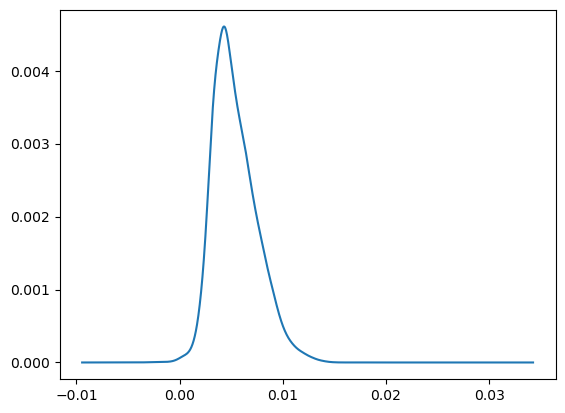

In [35]:
US_inflation = distributionForecast.query("country == 'United States'").set_index("date")['inflation']

plt.plot(
    US_inflation.iloc[-1]["inflation_grid"],
    US_inflation.iloc[-1]["pdf"]
    )